# ライブラリ

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler

In [7]:
# 表示オプションの設定
pd.set_option('display.max_columns', None)  # 列の数の制限をなくす
pd.set_option('display.width', 1000)        # 表示幅を広げる

# データ読み込み

In [8]:
train = pd.read_csv('../data/train.csv', index_col=None)
test = pd.read_csv('../data/test.csv', index_col=None)

- データの確認

In [9]:
# トレーニングデータの最初の5行を表示
print("Training Data - First 5 Rows:")
print(train.head())

# トレーニングデータの基本情報
print("\nTraining Data - Info:")
print(train.info())

# テストデータの基本情報
print("\nTest Data - Info:")
print(test.info())

# トレーニングデータの基本統計量
print("\nTraining Data - Describe:")
print(train.describe())

Training Data - First 5 Rows:
   gameId  blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueTotalGold  blueTotalExperience  blueWins
0       0               0          5           8            6                  0            0          14536                17256         0
1       1               1         10           1            5                  0            0          14536                17863         0
2       2               0          3          10            2                  0            0          17409                17256         0
3       3               1          7          10            8                  0            0          19558                18201         0
4       4               0          4           9            4                  0            0          17409                17256         0

Training Data - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):


# 各特徴量の説明

- 用意されている特徴量リスト

In [2]:


# 重複部分を削除
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

# 重複部分削除後、新しいインデックスに設定
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# 欠損値削除
train = train.dropna()
test = test.dropna()

# ID列削除
del train['id']
del test['id']

# year, yearsの削除
train['term'] = train['term'].str.replace('years', '')
test['term'] = test['term'].str.replace('years', '')

train['employment_length'] = train['employment_length'].str.replace(r'years?$', '', regex=True)
test['employment_length'] = test['employment_length'].str.replace(r'years?$', '', regex=True)


# FullyPaid=0, ChargedOff=1に設定
replacement_dict = {'FullyPaid': '0', 'ChargedOff': '1'}
train['loan_status'] = train['loan_status'].map(replacement_dict).fillna(train['loan_status'])

# 数値データにする
train["term"] = train["term"].astype(int)
test["term"] = test["term"].astype(int)

train["employment_length"] = train["employment_length"].astype(int)
test["employment_length"] = test["employment_length"].astype(int)

train["loan_status"] = train["loan_status"].astype(int)


# データフレームの分離
col_categoric = ["grade", "purpose", "application_type", "loan_status"]
train_numeric = train.drop(col_categoric, axis=1)
train_categoric = train[col_categoric]

# df_categoric内の"loan_status"列と、df_numericの列を横結合する
df_tmp = pd.concat([train_categoric["loan_status"], train_numeric], axis=1)

KeyError: 'id'

In [ ]:
train

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0
1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual,1
2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0
3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0
4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual,0
...,...,...,...,...,...,...,...,...,...
242145,2427.939262,3,13.673803,B4,8,debt_consolidation,657.206417,Individual,0
242146,1224.346665,3,11.793595,B3,10,debt_consolidation,699.763028,Individual,1
242147,2089.513458,3,8.218123,A4,1,other,724.556339,Individual,0
242148,3459.367114,3,14.875958,C2,9,debt_consolidation,688.249378,Individual,0


#### FullyPaidとChargedOffの関係

完済件数：199794
延滞件数：42356


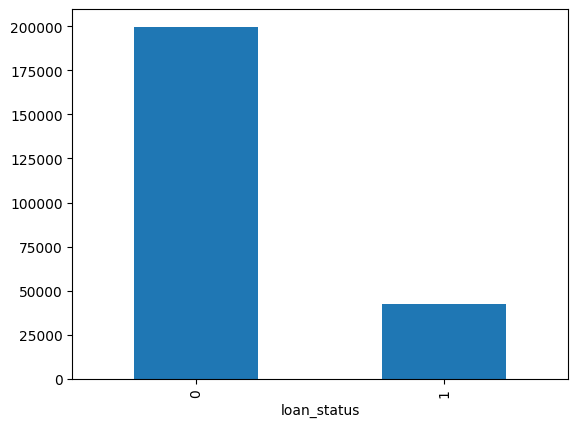

In [ ]:
counts_loan_status = train['loan_status'].value_counts()
counts_loan_status.plot(kind='bar')

print(f"完済件数：{train['loan_status'].value_counts().get(0, 0)}")
print(f"延滞件数：{train['loan_status'].value_counts().get(1, 0)}")

#### 量的データの可視化

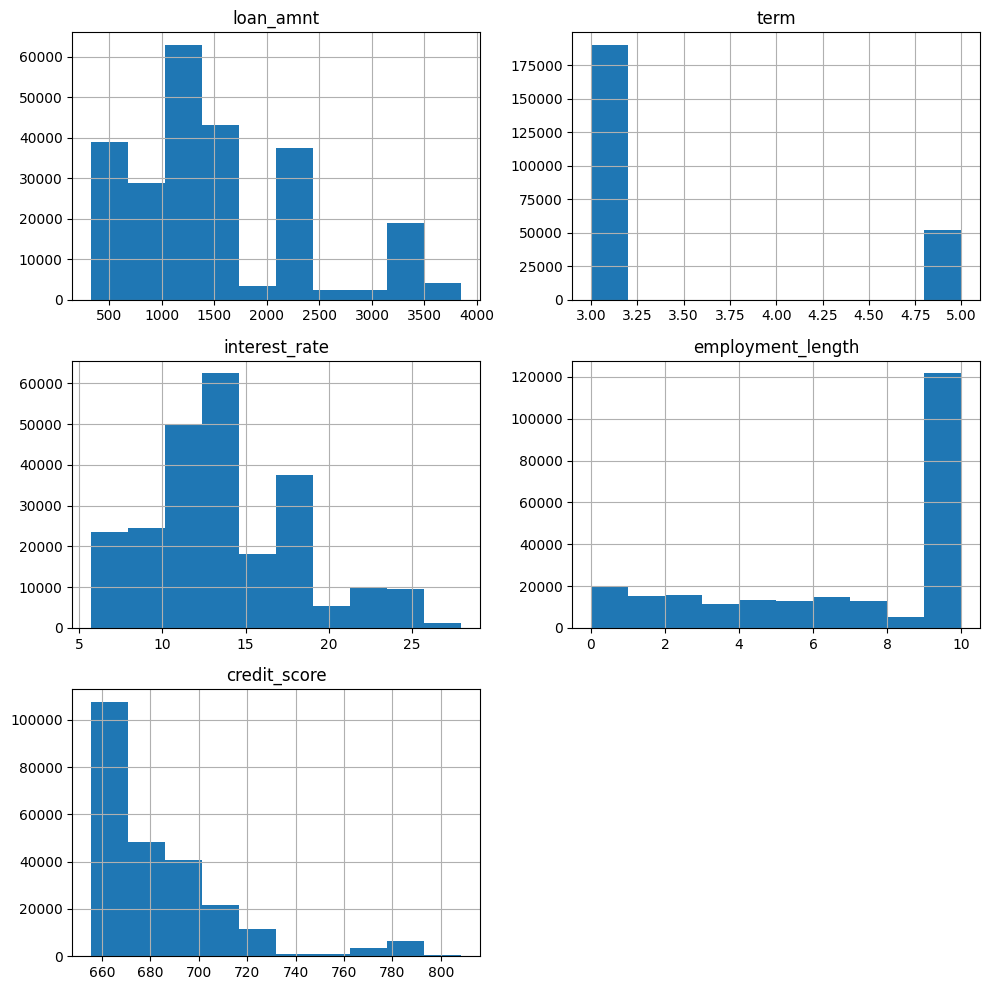

In [ ]:
train_numeric.hist(figsize=(10, 10))
plt.tight_layout()

C:\Users\104161\AppData\Local\Temp\ipykernel_17332\2806102922.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp.query("loan_status==0")[colname])
C:\Users\104161\AppData\Local\Temp\ipykernel_17332\2806102922.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp.query("loan_status==

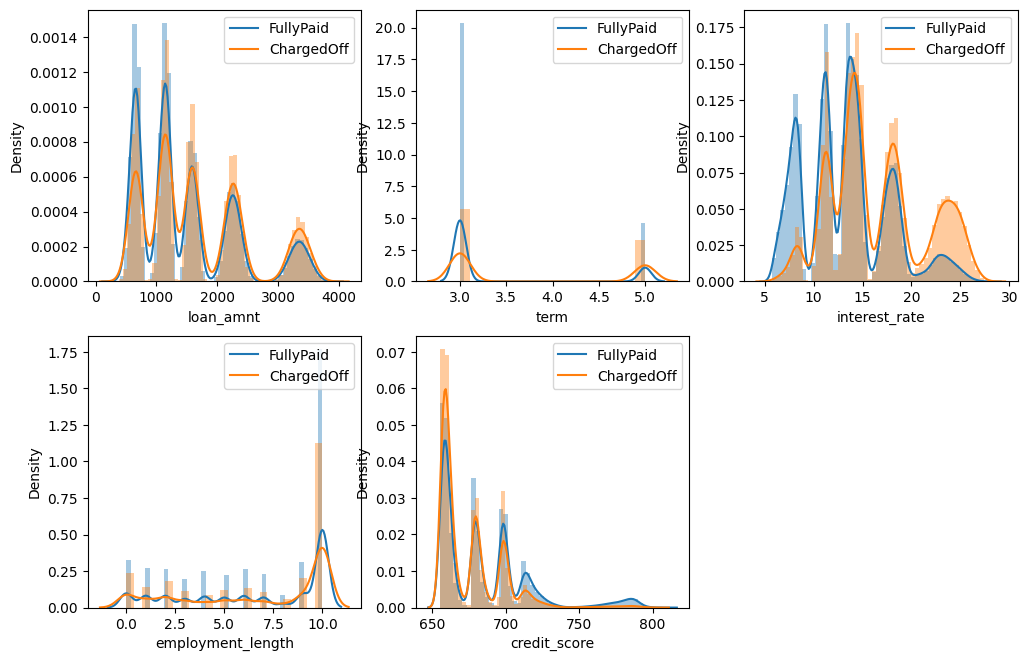

In [ ]:
# グラフの整形
plt.figure(figsize=(12, 12))

for ncol, colname in enumerate(train_numeric.columns):
    plt.subplot(3, 3, ncol+1) # plt.subplot(縦のプロット数, 横のプロット数, プロット番号)
    sns.distplot(df_tmp.query("loan_status==0")[colname])
    sns.distplot(df_tmp.query("loan_status==1")[colname]) # 重ねる
    plt.legend(labels=["FullyPaid", "ChargedOff"], loc='upper right') # 凡例

<Axes: >

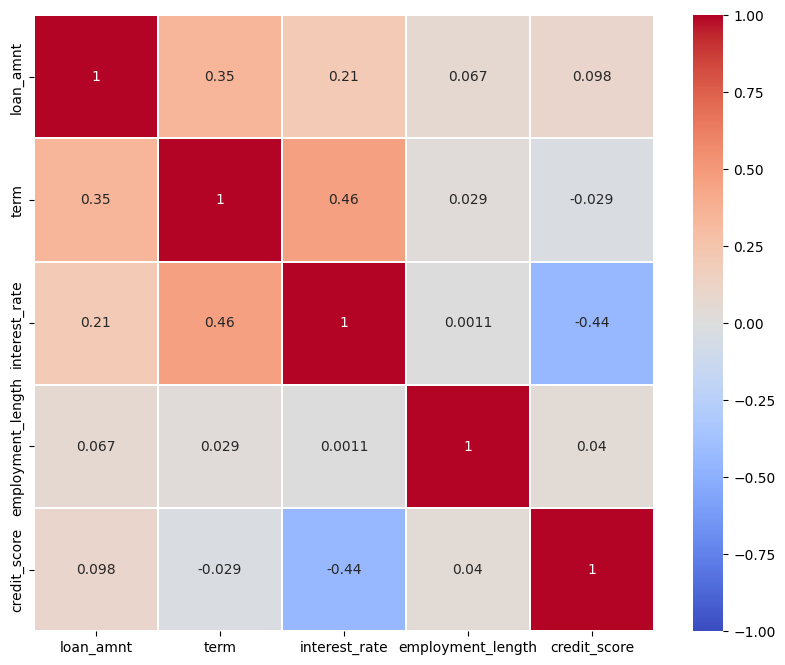

In [ ]:
# グラフの整形
plt.figure(figsize=(10, 8))

# ヒートマップの作成
sns.heatmap(train_numeric.corr(), vmin=-1.0, vmax=1.0, annot=True,
            cmap='coolwarm', linewidths=0.1) # corr関数で相関関数を算出

In [ ]:
# ダミー変数化
df = pd.get_dummies(
    train, columns=["grade", "purpose", "application_type"])

# 目的変数のデータフレーム
y = df["loan_status"]
# 説明変数のデータフレーム
X = df.drop(["loan_status"], axis=1)

# データの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [ ]:
# モデルの初期化
lr = LogisticRegression()

# モデルの学習
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 混同行列の作成
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# 混同行列をデータフレーム化
df_cm = pd.DataFrame(np.rot90(cm, 2), index=["実際のChargedOff", "実際のFullyPaid"], columns=["ChargedOffの予測", "FullyPaidの予測"])
print(df_cm)

# F1 Scoreの算出
f1 = f1_score(y_test, y_pred)
print(f1)

               ChargedOffの予測  FullyPaidの予測
実際のChargedOff           1089         15801
実際のFullyPaid             668         79302
0.11680163028905452


c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.draw()
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.draw()
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.draw()
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.draw()
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.draw()


(array([0.5, 1.5]),
 [Text(0, 0.5, '実際のChargedOff'), Text(0, 1.5, '実際のFullyPaid')])

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  func(*args, **kwargs)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  func(*args, **kwargs)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  func(*args, **kwargs)
c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  func(*args, **kwargs)
c:\Users

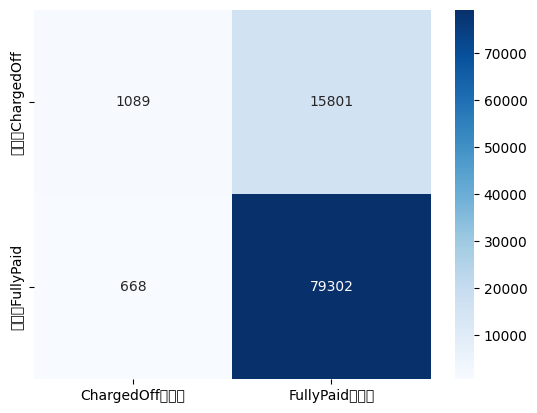

In [ ]:
# heatmapによる混同行列の可視化
sns.heatmap(df_cm, annot=True, fmt="2g", cmap='Blues')
plt.yticks(va='center')

In [ ]:
# 初期化
sampler = RandomUnderSampler(random_state=42)

# ダウンサンプリングの適用
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# 返ってきたBoolを数値に変換
df["loan_status"] = df["loan_status"].replace(True, 0).replace(False, 1)
df["loan_status"] = df["loan_status"].astype(int)

In [ ]:
# 学習
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

# 予測
y_pred = lr.predict(X_test)

c:\Users\104161\Anaconda3\envs\py310_analysis\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_cm = pd.DataFrame(np.rot90(cm, 2), index=["実際のChargedOff", "実際のFullyPaid"], columns=["ChargedOffの予測", "FullyPaidの予測"])
print(df_cm)

f1 = f1_score(y_test, y_pred)
print(f1)

               ChargedOffの予測  FullyPaidの予測
実際のChargedOff           1089         15801
実際のFullyPaid             668         79302
0.3826889585510275
